In [1]:
import json
import ROOT

Welcome to JupyROOT 6.30/02


In [3]:
file=ROOT.TFile("reco_standard_mu-_1930_-200_0.root","READ")
events=file.Events
events.Print() 

******************************************************************************
*Tree    :Events    : Tree Created by SimAna                                 *
*Entries :     1000 : Total =         5819926 bytes  File  Size =    1230645 *
*        :          : Tree compression factor =   4.67                       *
******************************************************************************
*Br    0 :eventID   : eventID/I                                              *
*Entries :     1000 : Total  Size=       4569 bytes  File Size  =       1520 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   2.68     *
*............................................................................*
*Br    1 :totalTime : totalTime/F                                            *
*Entries :     1000 : Total  Size=       4579 bytes  File Size  =       3668 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.11     *
*...................................................

In [6]:
files=[]
#for i in range(9):
#    file=ROOT.TFile(f"reco_displaced_mu+_1930_-200_{i}.root","READ")
#    files.append(file)
files=[ROOT.TFile("target_standard_mu-_1930_0.root","READ")]

In [7]:
import matplotlib.pyplot as plt

In [8]:
zs=[]
xs=[]
ys=[]
pzs=[]
pzs_st1=[]
pxs=[]
pxs_st1=[]
pys=[]
nhits_d3=[]
pos_hits_st3=[]
n_dimuons=[]
dimuon_pz=[]
truthdimuon_pz=[]
dimuon_mass=[]
truthdimuon_mass=[]
count=0
for file in files:
    print(file)
    events=file.Events
    for entry in events:
        zs.append(entry.truthtrack_z_vtx[0])
        ys.append(entry.truthtrack_y_vtx[0])
        xs.append(entry.truthtrack_x_vtx[0])
        pzs.append(entry.truthtrack_pz_vtx[0])
        pzs_st1.append(entry.truthtrack_pz_st1[0])
        pys.append(entry.truthtrack_py_vtx[0])
        pxs.append(entry.truthtrack_px_vtx[0])
        pxs_st1.append(entry.truthtrack_px_st1[0])
        nhits_d3.append(entry.n_hits_d3p+entry.n_hits_d3m)
        n_dimuons.append(entry.n_dimuons)

        #for i in range(entry.n_truthdimuons):
        #    truthdimuon_mass.append(entry.truthdimuon_mass[i])
        for i in range(entry.n_dimuons):
            if entry.dimuon_matched[i]==1 or 1==1 :
                #truthdimuon_mass.append(entry.truthdimuon_mass[0])
                dimuon_mass.append(entry.dimuon_mass[i])
                #truthdimuon_pz.append(entry.truthdimuon_pz[0])
                dimuon_pz.append(entry.dimuon_pz[i])
                #print("!")
                break
            #print("?")
        for i in range(entry.n_dimuons):
            if (entry.dimuon_matched[i]==1 or 1==1)and entry.n_truthdimuons>0 and entry.truthdimuon_z_vtx[0]<0 :
                count=count+1
                break
                
        for i in range(entry.n_hits):
            if entry.hit_detID[i]<=30 and entry.hit_detID[i]>=25 :
                pos_hits_st3.append(entry.hit_pos[i])

Name: target_standard_mu-_1930_0.root Title: 


In [9]:
print(len([x for x in nhits_d3 if x>=8]))
print(len(nhits_d3))

706
10000


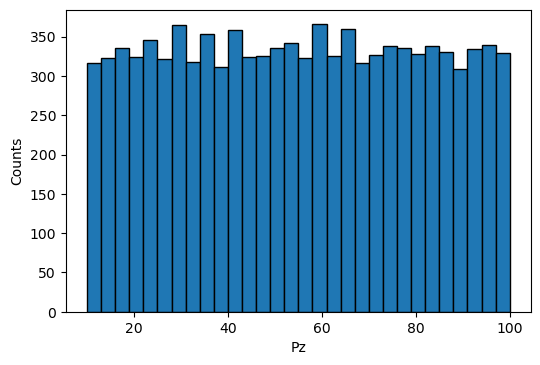

In [10]:
fig=plt.figure(dpi=100)
ax=fig.add_subplot()
ax.hist(pzs, bins=30, edgecolor='black')
ax.set_xlabel("Pz")
ax.set_ylabel("Counts")
fig.savefig("Pz.pdf")


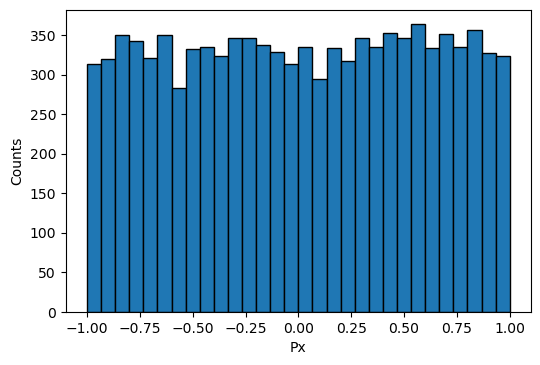

In [11]:
fig=plt.figure(dpi=100)
ax=fig.add_subplot()
ax.hist(pxs, bins=30, edgecolor='black')
ax.set_xlabel("Px")
ax.set_ylabel("Counts")
fig.savefig("Px.pdf")

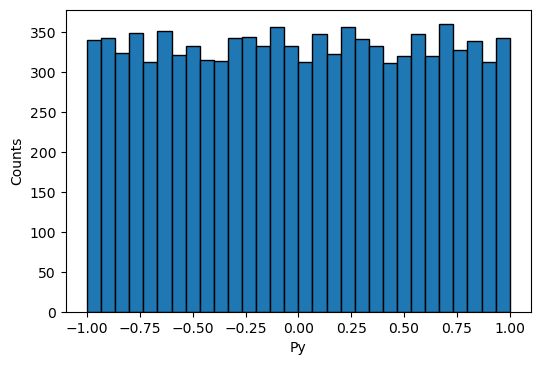

In [12]:
fig=plt.figure(dpi=100)
ax=fig.add_subplot()
ax.hist(pys, bins=30, edgecolor='black')
ax.set_xlabel("Py")
ax.set_ylabel("Counts")
fig.savefig("Py.pdf")

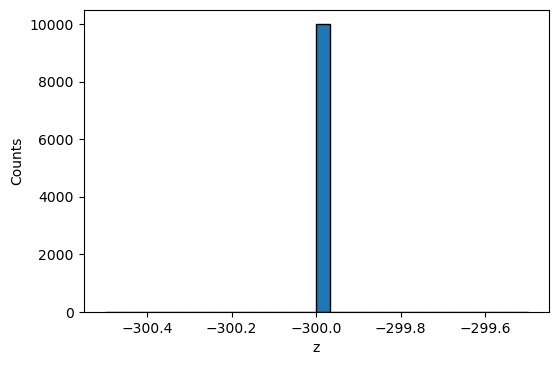

In [13]:
fig=plt.figure(dpi=100)
ax=fig.add_subplot()
ax.hist(zs, bins=30, edgecolor='black')
ax.set_xlabel("z")
ax.set_ylabel("Counts")
fig.savefig("z.pdf")

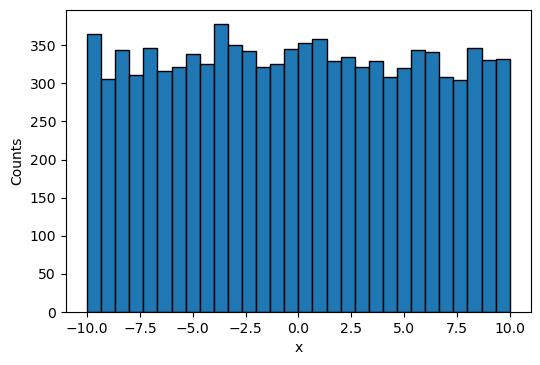

In [14]:
fig=plt.figure(dpi=100)
ax=fig.add_subplot()
ax.hist(xs, bins=30, edgecolor='black')
ax.set_xlabel("x")
ax.set_ylabel("Counts")
fig.savefig("x.pdf")

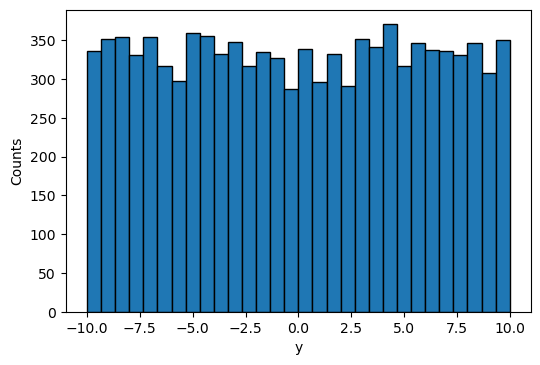

In [15]:
fig=plt.figure(dpi=100)
ax=fig.add_subplot()
ax.hist(ys, bins=30, edgecolor='black')
ax.set_xlabel("y")
ax.set_ylabel("Counts")
fig.savefig("y.pdf")

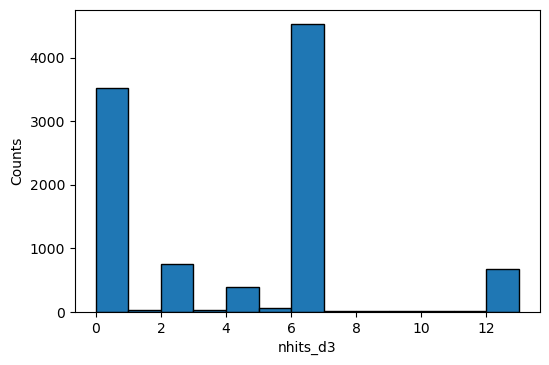

In [16]:
fig=plt.figure(dpi=100)
ax=fig.add_subplot()
ax.hist(nhits_d3, bins=13,range=(0,13), edgecolor='black')
ax.set_xlabel("nhits_d3")
ax.set_ylabel("Counts")
fig.savefig("nhits_d3.pdf")

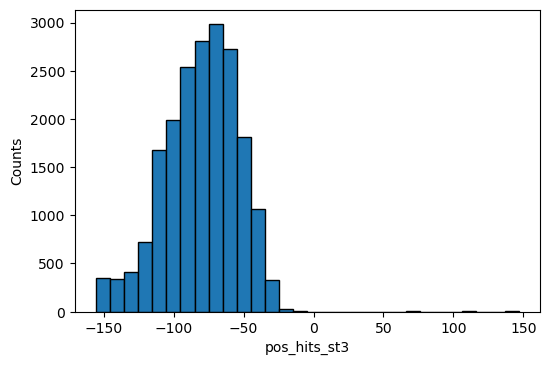

In [17]:
fig=plt.figure(dpi=100)
ax=fig.add_subplot()
ax.hist(pos_hits_st3, bins=30, edgecolor='black')
ax.set_xlabel("pos_hits_st3")
ax.set_ylabel("Counts")
fig.savefig("pos_hits_st3.pdf")

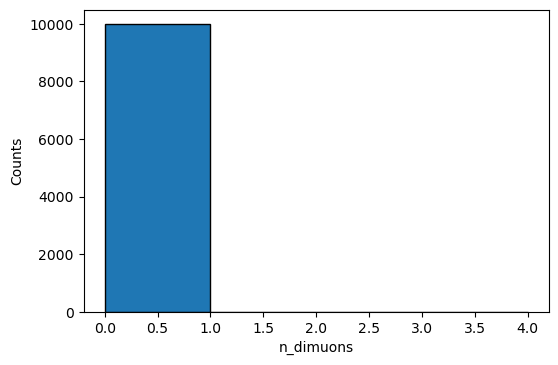

In [18]:
fig=plt.figure(dpi=100)
ax=fig.add_subplot()
ax.hist(n_dimuons, bins=4, range=(0,4),edgecolor='black')
ax.set_xlabel("n_dimuons")
ax.set_ylabel("Counts")
fig.savefig("n_dimuons.pdf")

In [19]:
eff=sum(n_dimuons)/len(n_dimuons)

In [52]:
eff

0.029222222222222222

(array([4.360e+03, 2.298e+03, 1.228e+03, 6.490e+02, 2.600e+02, 1.250e+02,
        5.500e+01, 1.900e+01, 4.000e+00, 2.000e+00]),
 array([25.00316429, 29.894631  , 34.78609772, 39.67756443, 44.56903114,
        49.46049786, 54.35196457, 59.24343128, 64.13489799, 69.02636471,
        73.91783142]),
 <BarContainer object of 10 artists>)

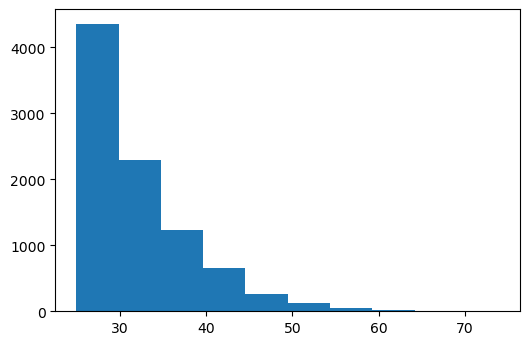

In [53]:
fig=plt.figure(dpi=100)
ax=fig.add_subplot()
ax.hist(pzs)

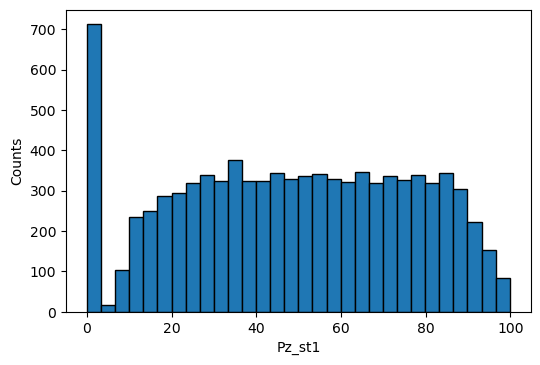

In [20]:
fig=plt.figure(dpi=100)
ax=fig.add_subplot()
ax.hist(pzs_st1, bins=30, edgecolor='black')
ax.set_xlabel("Pz_st1")
ax.set_ylabel("Counts")
fig.savefig("Pz_st1.pdf")

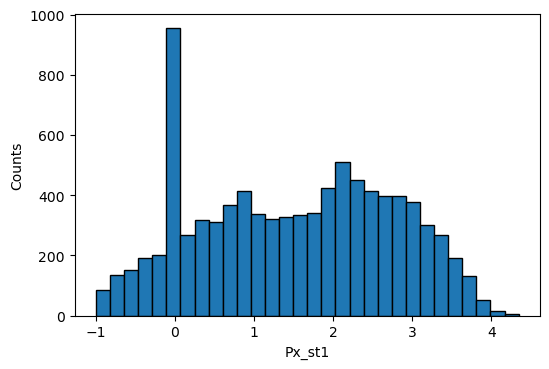

In [21]:
fig=plt.figure(dpi=100)
ax=fig.add_subplot()
ax.hist(pxs_st1, bins=30, edgecolor='black')
ax.set_xlabel("Px_st1")
ax.set_ylabel("Counts")
fig.savefig("Px_st1.pdf")

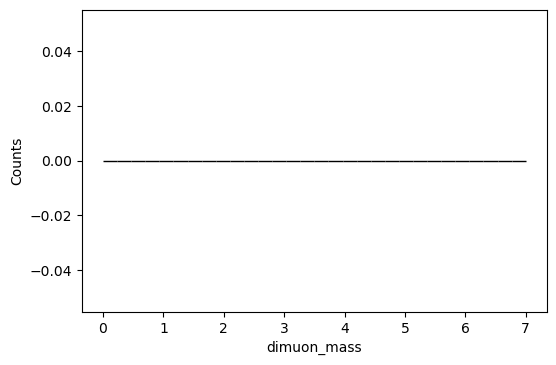

In [22]:
fig=plt.figure(dpi=100)
ax=fig.add_subplot()
ax.hist(dimuon_mass, bins=30, range=(0,7),edgecolor='black')
ax.set_xlabel("dimuon_mass")
ax.set_ylabel("Counts")
fig.savefig("dimuon_mass.pdf")

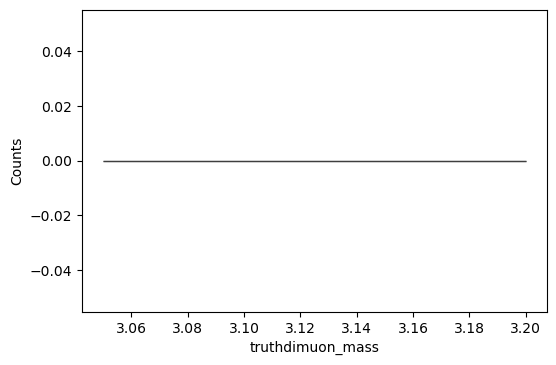

In [23]:
fig=plt.figure(dpi=100)
ax=fig.add_subplot()
ax.hist(truthdimuon_mass, bins=10000, range=(3.05,3.2),edgecolor='black')
ax.set_xlabel("truthdimuon_mass")
ax.set_ylabel("Counts")
fig.savefig("truthdimuon_mass.pdf")

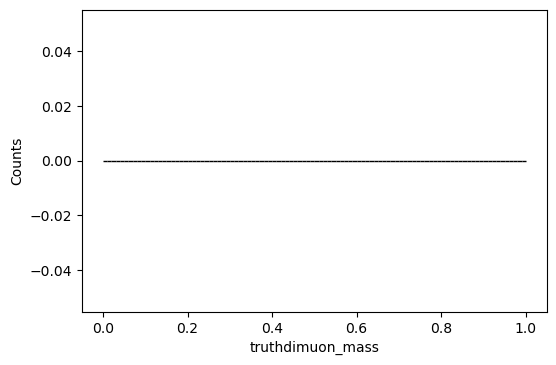

In [24]:
fig=plt.figure(dpi=100)
ax=fig.add_subplot()
ax.hist([a-b for a,b in zip(dimuon_mass,truthdimuon_mass)], bins=100, edgecolor='black')
ax.set_xlabel("truthdimuon_mass")
ax.set_ylabel("Counts")
fig.savefig("truthdimuon_mass.pdf")

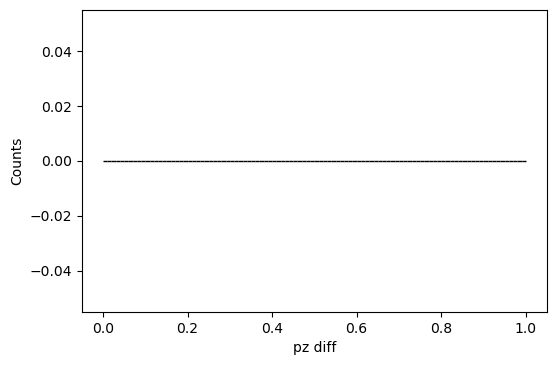

In [25]:
fig=plt.figure(dpi=100)
ax=fig.add_subplot()
ax.hist([a-b for a,b in zip(dimuon_pz,truthdimuon_pz)], bins=100, edgecolor='black')
ax.set_xlabel("pz diff")
ax.set_ylabel("Counts")
fig.savefig("truthdimuon_mass.pdf")

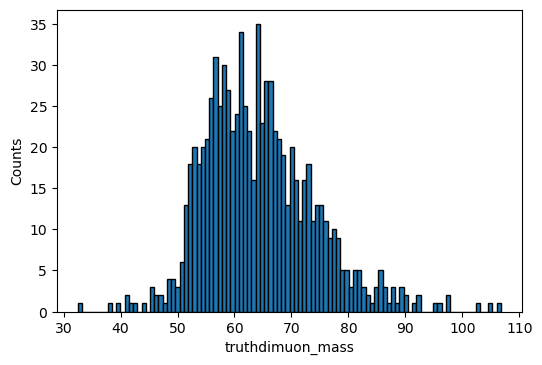

In [39]:
fig=plt.figure(dpi=100)
ax=fig.add_subplot()
ax.hist(dimuon_pz, bins=100, edgecolor='black')
ax.set_xlabel("truthdimuon_mass")
ax.set_ylabel("Counts")
fig.savefig("truthdimuon_mass.pdf")

In [40]:
c=[a-b for a,b in zip(dimuon_pz,truthdimuon_pz)]
c=truthdimuon_pz

In [41]:
for i in range(len(c)):
    if not ( c[i]>-200 and c[i]<200 ):
        print(c[i])
